In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Problem 1

$$ u_xx + u_yy = - 2\cos(x)\sin(y)$$

$$u_ex = \cos(x)\sin(y)$$

$$ 

In [5]:
def u_ex(x, y):
    return np.cos(x) * np.sin(y)

In [ ]:
def conjugate_gradient_method(h=0.05,tolerance = 10**(-8)):
    N = int(1/h) + 1 
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    
    # Initialize solution and boundary conditions
    u = np.zeros((N, N))
    yy, xx = np.meshgrid(y, x)
    u_exact = u_ex(xx, yy)
    
    # Apply boundary conditions
    u[:, 0] = u_exact[:, 0]    
    u[:, -1] = u_exact[:, -1]  
    u[0, :] = u_exact[0, :]    
    u[-1, :] = u_exact[-1, :]  
    
    # Initial residual: r = b - Au
    r = np.zeros((N, N))
    for i in range(1, N-1):
        for j in range(1, N-1):
            # Compute Au (discrete Laplacian)
            Au = (u[i+1, j] + u[i-1, j] - 4*u[i,j] + u[i, j+1] + u[i, j-1]) / h**2
            r[i,j] = (-2*np.cos(x[i])*np.sin(y[j])) - Au
    
    q = r.copy()
    error = []
    
    while True:
        Aq = np.zeros((N, N))
        for i in range(1, N-1):
            for j in range(1, N-1):
                Aq[i,j] = (q[i+1, j] + q[i-1, j] - 4*q[i,j] + q[i, j+1] + q[i, j-1]) / h**2
        
        # Compute alpha
        rr = np.sum(r[1:-1, 1:-1]**2)
        alpha = rr / np.sum(q[1:-1, 1:-1] * Aq[1:-1, 1:-1])
        
        # Update solution
        u_old = u.copy()
        u[1:-1, 1:-1] += alpha * q[1:-1, 1:-1]
        
        # Update residual
        r_new = r.copy()
        r_new[1:-1, 1:-1] -= alpha * Aq[1:-1, 1:-1]
        
        # Compute beta
        rr_new = np.sum(r_new[1:-1, 1:-1]**2)
        beta = rr_new / rr
        
        # Update q
        q[1:-1, 1:-1] = r_new[1:-1, 1:-1] + beta * q[1:-1, 1:-1]
        
        r = r_new

        max_error = np.max(np.abs(u - u_exact))
        error.append(max_error)
        
        # Check convergence
        change = np.sqrt(np.sum((u - u_old)**2)) * h 
        if change < tolerance:
            return u, error
    
    

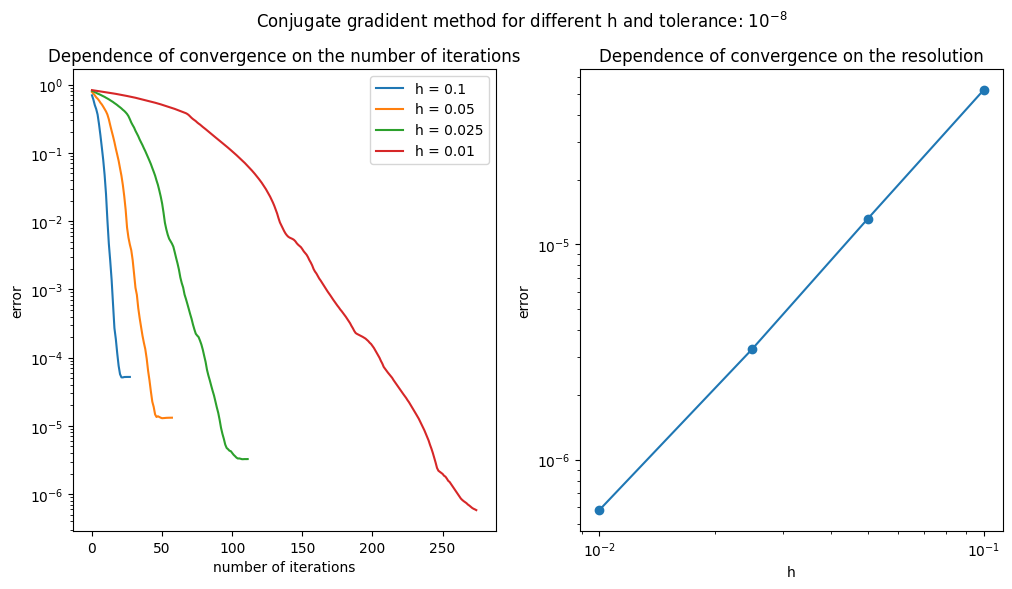

Order of convergence: 1.954778737700221
Number of iterations for h = 0.1: 28, complete convergence in 121  
Number of iterations for h = 0.05: 58, complete convergence in 441  
Number of iterations for h = 0.025: 112, complete convergence in 1681  
Number of iterations for h = 0.01: 275, complete convergence in 10201  


In [80]:
function = []
errors = []
hs = [0.1,0.05,0.025,0.01]
tolerances = [10**(-8), 10**(-16)]
for h in hs:
    u,error = conjugate_gradient_method(h,tolerance=tolerances[0])
    function.append(u)
    errors.append(error)
fig,ax = plt.subplots(1,2, figsize = (12,6))
fig.suptitle(r'Conjugate gradident method for different h and tolerance: $10^{-8}$ ')
a = [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]]
for i in range(len(hs)):
    ax[0].set_xlabel('number of iterations')
    ax[0].set_ylabel('error')
    ax[0].set_title(rf'Dependence of convergence on the number of iterations')
    ax[0].semilogy(np.arange(0,len(errors[i])),errors[i],label = f'h = {hs[i]}')
    ax[0].legend()

ax[1].loglog(hs, [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]],marker = 'o')

ax[1].set_title('Dependence of convergence on the resolution')
ax[1].set_xlabel('h')
ax[1].set_ylabel('error')

plt.show()
print(f'Order of convergence: {stats.linregress(np.log(hs),np.log(a)).slope}')
for i in range(len(hs)):
    print(f'Number of iterations for h = {hs[i]}: {len(errors[i])}, complete convergence in {(int(1/hs[i]) + 1)**2}  ')


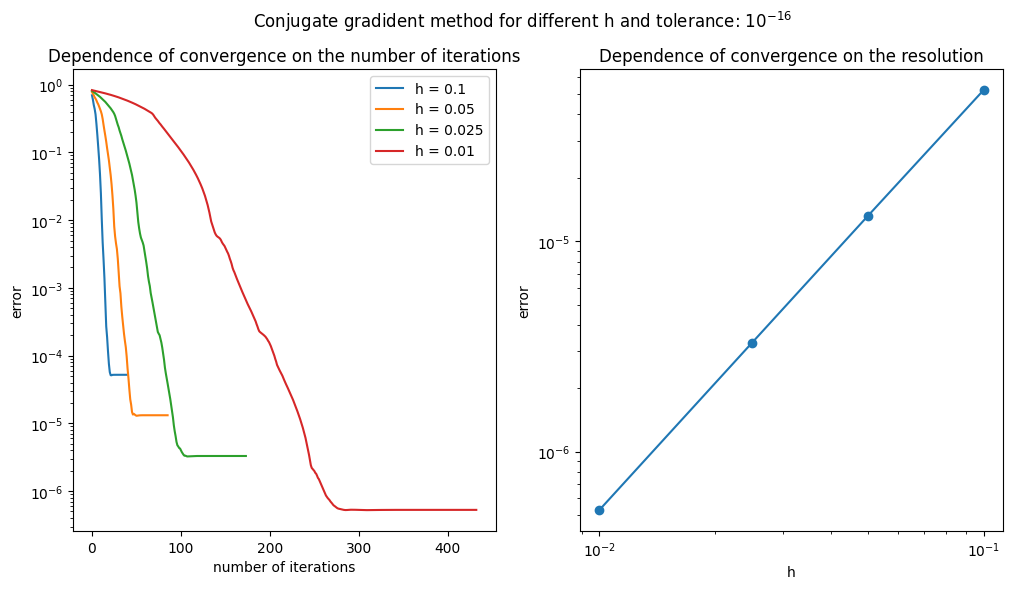

Order of convergence: 1.9945751706548134
Number of iterations for h = 0.1: 40, complete convergence in 121  
Number of iterations for h = 0.05: 86, complete convergence in 441  
Number of iterations for h = 0.025: 174, complete convergence in 1681  
Number of iterations for h = 0.01: 433, complete convergence in 10201  


In [81]:
function = []
errors = []
hs = [0.1,0.05,0.025,0.01]
tolerances = [10**(-8), 10**(-16)]
for h in hs:
    u,error = conjugate_gradient_method(h,tolerance=tolerances[1])
    function.append(u)
    errors.append(error)
fig,ax = plt.subplots(1,2, figsize = (12,6))
fig.suptitle(r'Conjugate gradident method for different h and tolerance: $10^{-16}$ ')
a = [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]]
for i in range(len(hs)):
    ax[0].set_xlabel('number of iterations')
    ax[0].set_ylabel('error')
    ax[0].set_title(rf'Dependence of convergence on the number of iterations')
    ax[0].semilogy(np.arange(0,len(errors[i])),errors[i],label = f'h = {hs[i]}')
    ax[0].legend()

ax[1].loglog(hs, [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]],marker = 'o')

ax[1].set_title('Dependence of convergence on the resolution')
ax[1].set_xlabel('h')
ax[1].set_ylabel('error')

plt.show()
print(f'Order of convergence: {stats.linregress(np.log(hs),np.log(a)).slope}')
for i in range(len(hs)):
    print(f'Number of iterations for h = {hs[i]}: {len(errors[i])}, complete convergence in {(int(1/hs[i]) + 1)**2}  ')


In [100]:
def sor(h=0.05,tolerance=10**(-8)):
    
    omega = 2/(1+np.pi*h)
    

    N = int(1/h) + 1 
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    
    u = np.zeros((N, N))
    error = []
    
    
    yy,xx = np.meshgrid(y, x)
    u_exact = u_ex(xx, yy)
    
   
    u[:, 0] = u_exact[:, 0]    
    u[:, -1] = u_exact[:, -1]  
    u[0, :] = u_exact[0, :]    
    u[-1, :] = u_exact[-1, :]  
    
    while True:
        u_old = u.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                u_gs = (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] 
                        + 2 * np.cos(x[i]) * np.sin(y[j]) * h**2) / 4
                u[i, j] = omega * u_gs + (1 - omega) * u_old[i, j]
        
        change = np.sqrt(np.sum((u - u_old)**2)) * h 
        max_error = np.max(np.abs(u - u_exact))
        error.append(max_error)
        
        if change < tolerance:
            return u, error

In [101]:
function = []
errors = []
hs = [0.1,0.05,0.025,0.01]
tolerances = [10**(-8), 10**(-16)]
for h in hs:
    u,error = sor(h=h,tolerance=tolerances[0])
    function.append(u)
    errors.append(error)

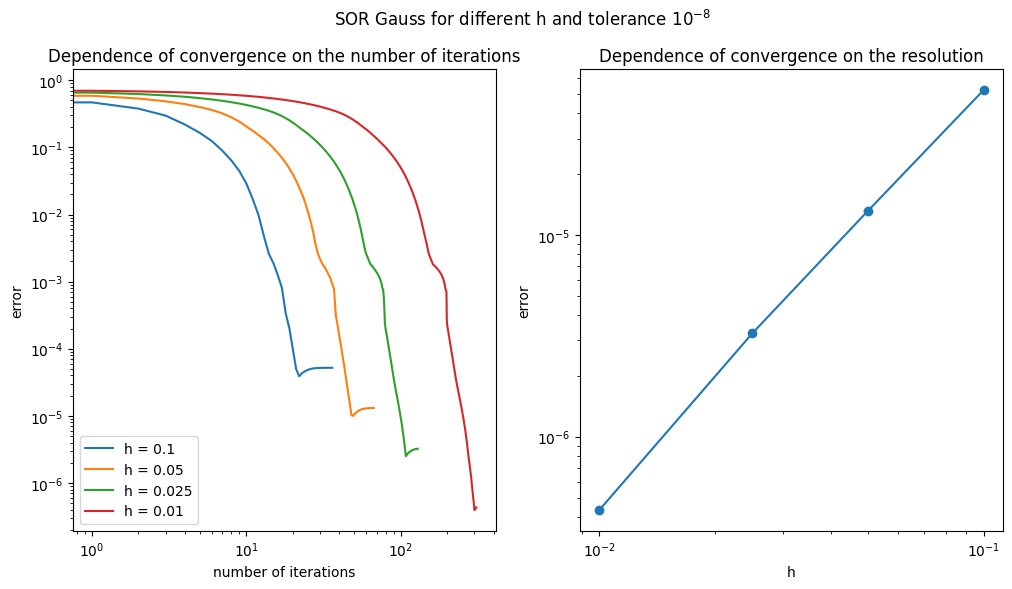

Order of convergence: 2.077973114016815
Number of iterations for h = 0.1: 37
Number of iterations for h = 0.05: 68
Number of iterations for h = 0.025: 130
Number of iterations for h = 0.01: 310


In [102]:
fig,ax = plt.subplots(1,2, figsize = (12,6))
fig.suptitle(r'SOR Gauss for different h and tolerance $10^{-8}$')
a = [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]]
for i in range(len(hs)):
    ax[0].set_xlabel('number of iterations')
    ax[0].set_ylabel('error')
    ax[0].set_title(rf'Dependence of convergence on the number of iterations')
    ax[0].loglog(np.arange(0,len(errors[i])),errors[i],label = f'h = {hs[i]}')
    ax[0].legend()

ax[1].loglog(hs, [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]],marker = 'o')

ax[1].set_title('Dependence of convergence on the resolution')
ax[1].set_xlabel('h')
ax[1].set_ylabel('error')

plt.show()
print(f'Order of convergence: {stats.linregress(np.log(hs),np.log(a)).slope}')
for i in range(len(hs)):
    print(f'Number of iterations for h = {hs[i]}: {len(errors[i])}')


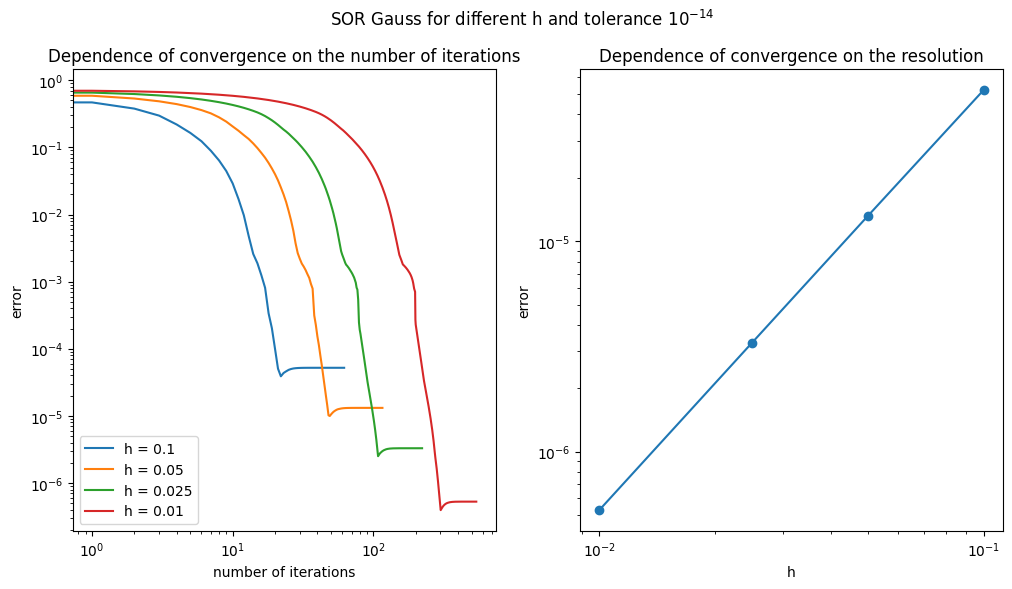

Order of convergence: 1.9945752696186692
Number of iterations for h = 0.1: 63
Number of iterations for h = 0.05: 117
Number of iterations for h = 0.025: 223
Number of iterations for h = 0.01: 540


In [103]:
function = []
errors = []
for h in hs:
    u,error = sor(h=h,tolerance=10**(-14))
    function.append(u)
    errors.append(error)
fig,ax = plt.subplots(1,2, figsize = (12,6))
fig.suptitle(r'SOR Gauss for different h and tolerance $10^{-14}$')
a = [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]]
for i in range(len(hs)):
    ax[0].set_xlabel('number of iterations')
    ax[0].set_ylabel('error')
    ax[0].set_title(rf'Dependence of convergence on the number of iterations')
    ax[0].loglog(np.arange(0,len(errors[i])),errors[i],label = f'h = {hs[i]}')
    ax[0].legend()

ax[1].loglog(hs, [errors[0][-1],errors[1][-1],errors[2][-1],errors[3][-1]],marker = 'o')

ax[1].set_title('Dependence of convergence on the resolution')
ax[1].set_xlabel('h')
ax[1].set_ylabel('error')

plt.show()
print(f'Order of convergence: {stats.linregress(np.log(hs),np.log(a)).slope}')
for i in range(len(hs)):
    print(f'Number of iterations for h = {hs[i]}: {len(errors[i])}')
